In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("breastCancer.csv")
df=df.drop('id',axis=1)

In [5]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
df.replace("?", float("NaN"), inplace=True)
df.dropna(inplace=True)


In [7]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


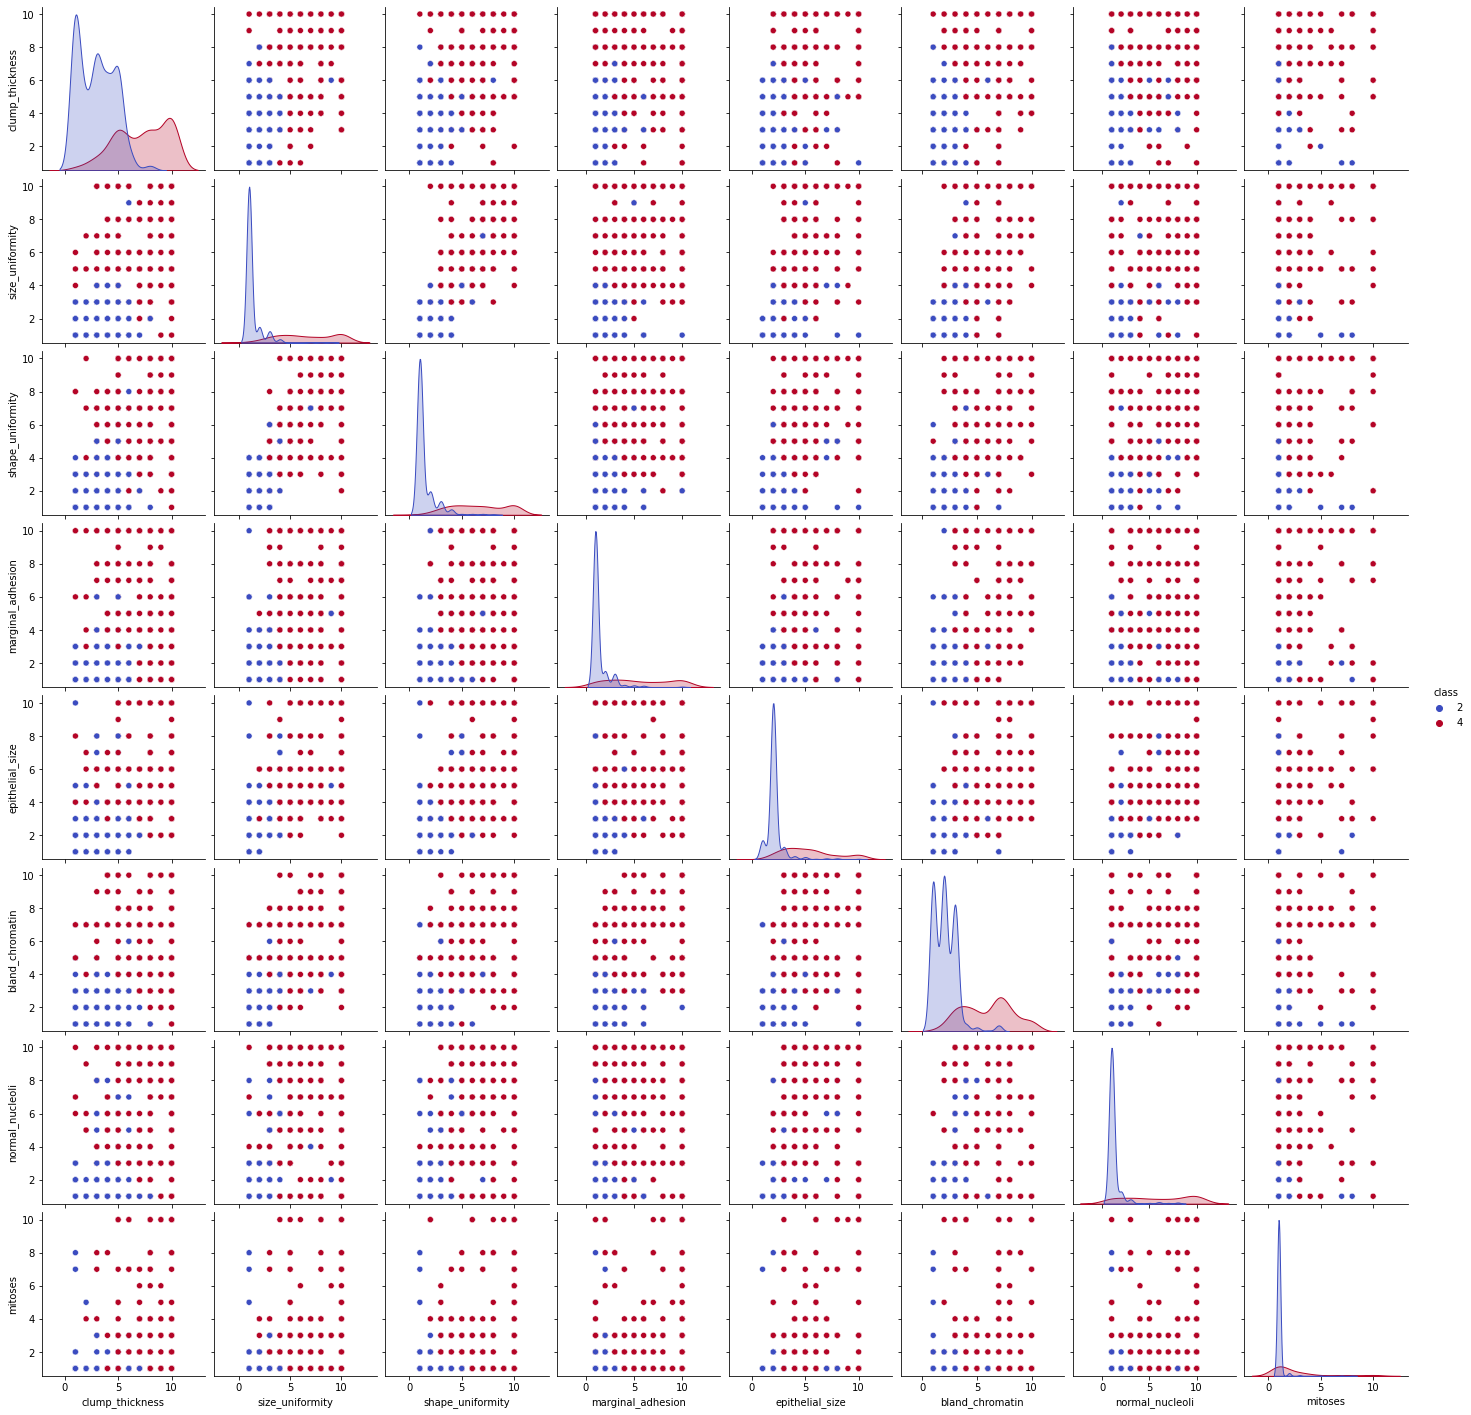

In [10]:
sns.pairplot(df,hue='class',palette='coolwarm')


<AxesSubplot:>

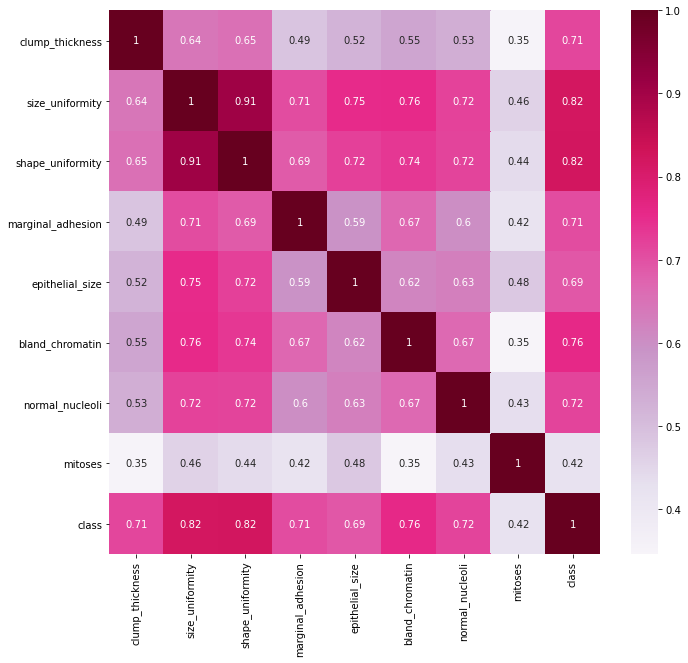

In [32]:
fig, ax = plt.subplots(figsize=(11,10))
sns.heatmap(df.corr(),annot=True,cmap='PuRd')

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(df.drop('class',axis=1))

StandardScaler()

In [43]:
scaled_features = scaler.transform(df.drop('class',axis=1))

In [44]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['class'],
                                                    test_size=0.30)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
pred = knn.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,pred))

[[123   6]
 [  4  72]]


In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       129
           4       0.92      0.95      0.94        76

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [96]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

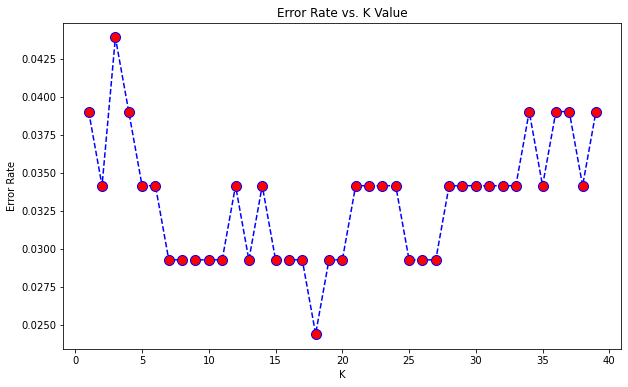

In [97]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [98]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[132   5]
 [  3  65]]


              precision    recall  f1-score   support

           2       0.98      0.96      0.97       137
           4       0.93      0.96      0.94        68

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [58]:

knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[124   5]
 [  3  73]]


              precision    recall  f1-score   support

           2       0.98      0.96      0.97       129
           4       0.94      0.96      0.95        76

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

